# 1. Automated Pipeline

![](https://imgur.com/vKvZapp.png)

[Popular Methods SKLearn](https://www.educative.io/blog/scikit-learn-cheat-sheet-classification-regression-methods)

# 2. Design Pipeline

## 2.1. Data German Credit

German Credit is a dataset of the credit history of 1000 different accounts. Our goal is to use this credit history to predict the likelihood that a customer will repay a loan. The data set includes 20 input variables, including 7 continuous variables (numeric) and 13 categorical variables.

The target variable (the column `Response` in the last position) has the value 1 for Good customers and 2 for Bad customers. Good customer is default customer and we call it Negative Class, while Bad customer is the opposite case and is Positive class.

This is an unbalanced dataset when the Good label (Negative) accounts for 70% and the Bad label only 30% (Positive).

### Overview

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read Data CSV
# Header = None -> Pandas automatically assign the FIRST ROW OF DF (which is the actual column names) to the FIRST ROW (hence your columns no longer have names)
# Header = 0 -> Pandas first deletes column names (header: row 1) and then assign new column names to them (only if you pass names = [........] while loading your file).

df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data", 
                 header=None,names=['StaAcc', 'DuMon', 'CredHis', 'Purpose', 'CredAmt', 'SavAcc', \
                                     'PreEmpl', 'InsRt', 'PerSta', 'OthDebtor', 'PreRe', 'Property', \
                                     'Age', 'IntPla', 'Housing', 'ExstCredit', 'Job', 'NoMain', 'Phone', 'ForWorker', "Response"],
                 index_col = None, sep=" ")
df.head()

,StaAcc,DuMon,CredHis,Purpose,CredAmt,SavAcc,PreEmpl,InsRt,PerSta,OthDebtor,...,Property,Age,IntPla,Housing,ExstCredit,Job,NoMain,Phone,ForWorker,Response
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [3]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StaAcc      1000 non-null   object
 1   DuMon       1000 non-null   int64 
 2   CredHis     1000 non-null   object
 3   Purpose     1000 non-null   object
 4   CredAmt     1000 non-null   int64 
 5   SavAcc      1000 non-null   object
 6   PreEmpl     1000 non-null   object
 7   InsRt       1000 non-null   int64 
 8   PerSta      1000 non-null   object
 9   OthDebtor   1000 non-null   object
 10  PreRe       1000 non-null   int64 
 11  Property    1000 non-null   object
 12  Age         1000 non-null   int64 
 13  IntPla      1000 non-null   object
 14  Housing     1000 non-null   object
 15  ExstCredit  1000 non-null   int64 
 16  Job         1000 non-null   object
 17  NoMain      1000 non-null   int64 
 18  Phone       1000 non-null   object
 19  ForWorker   1000 non-null   object
 20  Response 

In [4]:
# Describe statistics
df.describe()

,DuMon,CredAmt,InsRt,PreRe,Age,ExstCredit,NoMain,Response
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


Preliminary descriptive statistics show that the variables differ by large units. The average low is 1.155, and the highest is up to 3271.258. Therefore, it is likely that we will need to normalize the variables to remove unit differences before building the model.

## 2.2. Distributed Variables

### 2.1.2.1. Continuous Variable

In [32]:
# Select dtype is float/int to find numeric var to plot 
numeric_cols = df.select_dtypes(include=['float','int']).columns
df_numcols = df[numeric_cols]

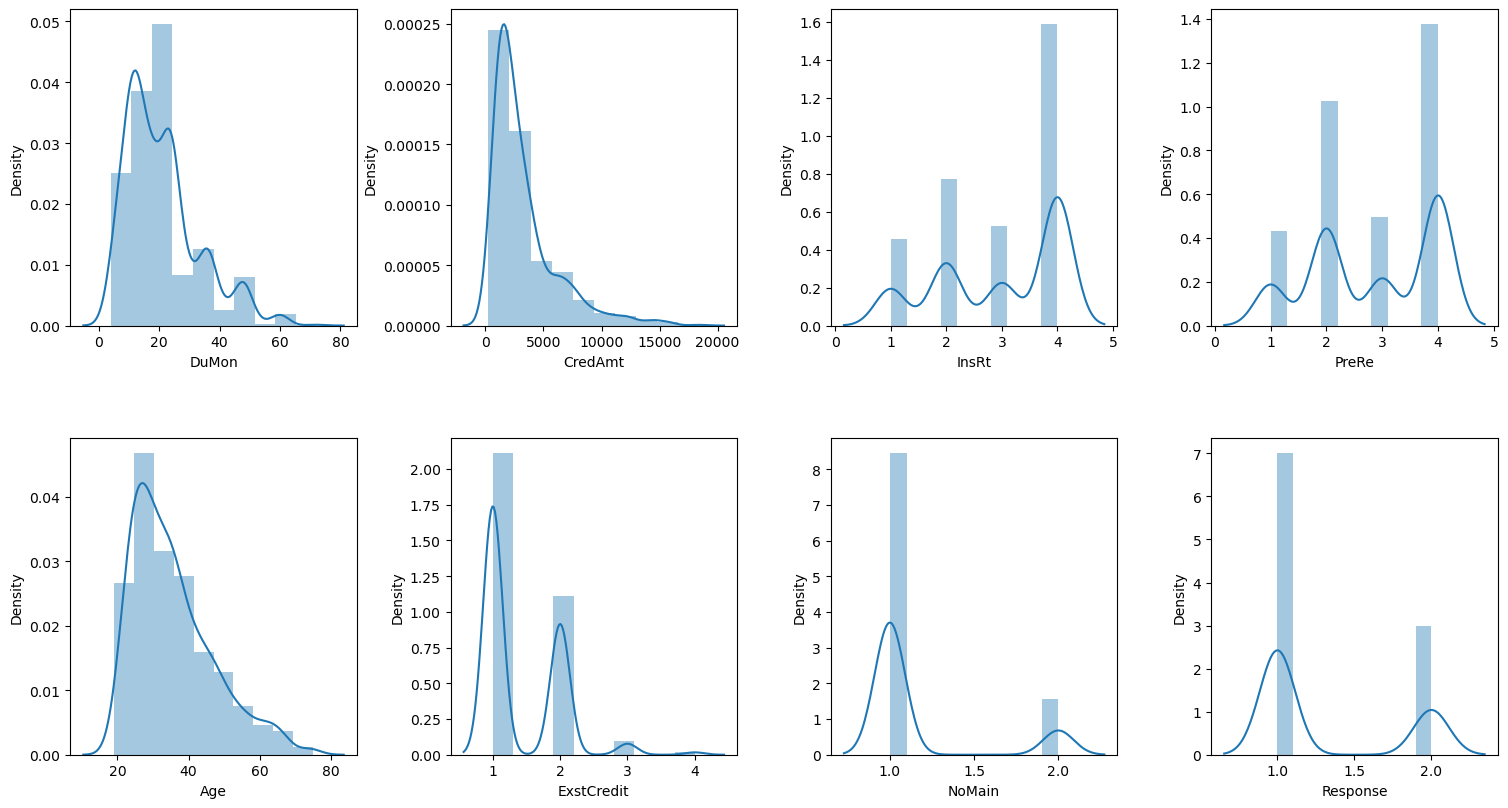

In [118]:
# Destiny
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)

fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize=(15, 8))
index = 0
axs = axs.flatten()
for k,v in df_numcols.items():
    sns.distplot(v, bins = 10, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show();

### 2.1.2.2. Category Variable

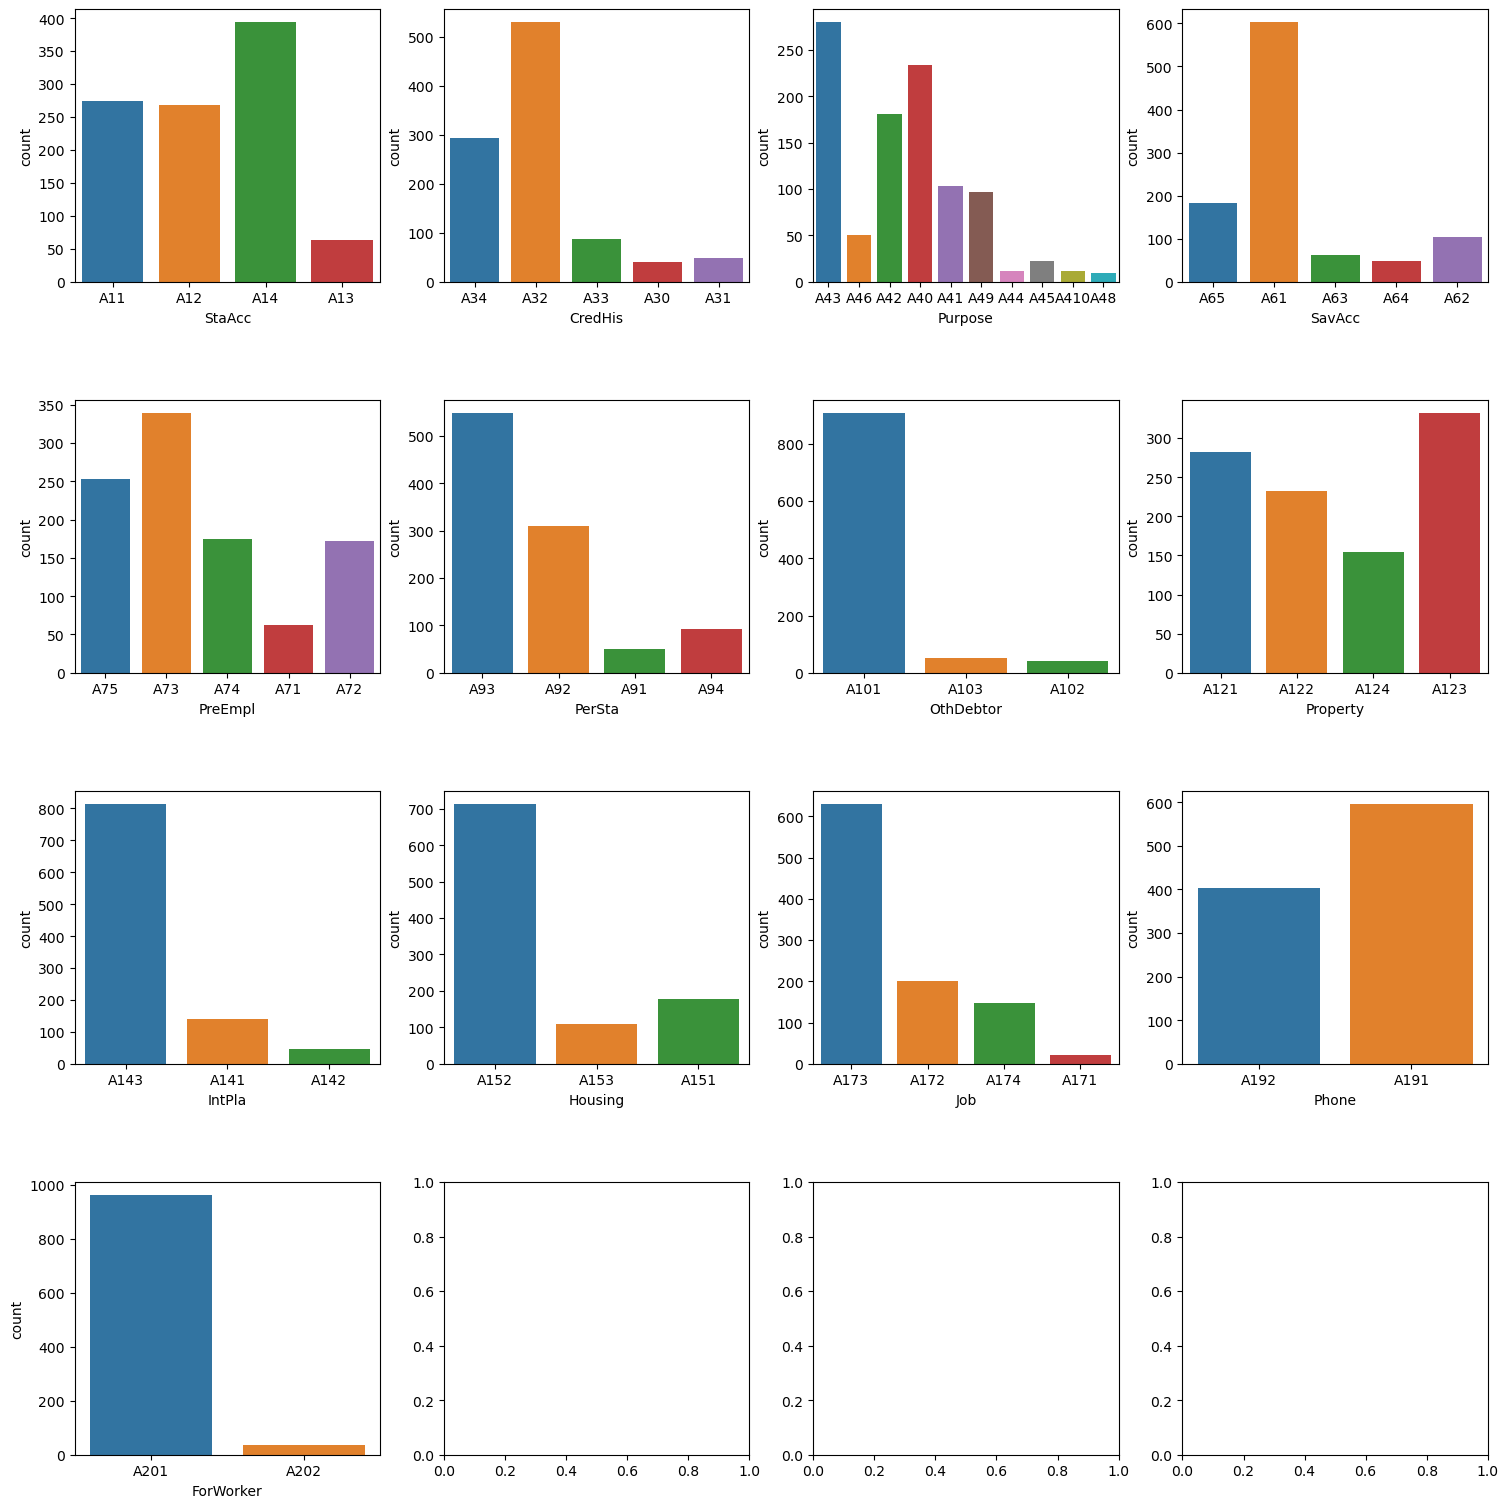

In [106]:
# Choose column with type = object
cate_cols = df.select_dtypes('object').columns
df_catecols = df[cate_cols]

# Plot
fig, axs = plt.subplots(nrows = 4, ncols = 4, figsize=(15, 15))
index = 0
axs = axs.flatten()
for name_col, cate_col in df_catecols.items():
    sns.countplot(cate_col, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show();

We see many labels in the categorical variable with minimal observations. Empirically, minority labels can be specific to an output label. So we can further investigate how the GOOD/BAD ratio is different in these labels. Their evaluation results can help us draw some valuable conclusions for label classification.

## 2.3. Train, Val & Test Set

In [8]:
from sklearn.model_selection import train_test_split

# Train/Test = 80/20
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify = df['Response'])  # startify: Balanced Good/Bad for train & test set
X_train = df_train.copy()
y_train = X_train.pop("Response")

X_test = df_test.copy()
y_test = X_test.pop("Response") # Pop return value remove > y_test in [1,2]

In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 20) (800,)
(200, 20) (200,)


## 2.4. Preprocessing Model

* **Encoding categorical features** (`OneHotEncoder`).
  
* **Processing missing data** (`SimpleImputer`)
  
* **Removing outlier** (`MinMaxScaler`)

### Separate processing for continuous and categorical variables 

Because continuous variables and categorical variables have different properties, it is possible to train the model on it directly for continuous variables. We will need to encode categorical variables into an arithmetic variable before training. This will require a separate processing pipeline for each type of variable. To build a pipeline in sklearn, we use the `Pipeline()` function. Inside this function is a list of steps to be processed in sequence.

In [10]:
# List names of continuous & category vars
cat_names = list(X_train.select_dtypes('object').columns)
num_names = list(X_train.select_dtypes(['float', 'int']).columns)

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Pipeline process for category variable
cat_pl= Pipeline(
    steps=[('imputer', SimpleImputer(strategy='most_frequent')),    # Imputation transformer for completing missing values
           ('onehot', OneHotEncoder())])                            # Encode categorical features as a one-hot numeric array.

# Pipeline process for continuous variable
num_pl = Pipeline(
    steps=[('imputer', KNNImputer(n_neighbors=7)),                 # Imputation for completing missing values using kNN
           ('scaler', MinMaxScaler())])                            # Process noisy data by MinMax scaler,
                                                                   # Transform features by scaling each feature to a given range

The steps of `Pipeline` are a tuple of two elements. The first element is the name of the processing step, and the second element is the corresponding processing method. Naming the processing step helps us to grasp the order and control the entire process.

In [12]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(                                # Applies transformers to columns of an array or pandas DataFrame
    transformers=[('num', num_pl, num_names),                    # Applied pipeline for continuous var
                  ('cat', cat_pl, cat_names)])                   # Applied pipeline for category var

Thus, the continuous variables specified in the list `num_names` will apply the pipeline `num_pl` processing, and the categorical variables in the `cate_names` list will use the `cat_pl` pipeline processing.

## 2.5. Completed Pipeline (Preprocessing Data + Train Model)

After completing the data preprocessing Pipeline, we can get clean output data. Next, we need to pass the cleaned data through the model for training. Both the data preprocessing and model training steps can be further encapsulated in a Pipeline as follows:

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score                 # accuracy_score only for classification

# Completed training pipeline
completed_pl = Pipeline(
    steps=[("preprocessor", preprocessor),                  # Pipeline
           ("classifier", RandomForestClassifier())])       # Model

# Training
completed_pl.fit(X_train, y_train)

# Accuracy Train
y_train_pred = completed_pl.predict(X_train)
print(f"Accuracy on train: {accuracy_score(list(y_train), list(y_train_pred)):.2f}")
# Accuracy Test
y_pred = completed_pl.predict(X_test)
print(f"Accuracy on test: {accuracy_score(list(y_test), list(y_pred)):.2f}")

Accuracy on train: 1.00
Accuracy on test: 0.79


Thus, we have completed a simple Pipeline for the solvency classification model. The model has an accuracy of 100% on the train and test sets of 77%, showing overfitting. To overcome overfitting, we can perform `cross-validation`.

# 3. Cross validation

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

## 3.1. Model Measure

### 3.1.1. Predict Problem

$$\text{MSE (Mean Squared Error)} = \frac{1}{n}\sum_{i=1}^{n} (y_i-\hat{y}_i)^2$$

$$\text{RMSE (Root Mean Squared Error)} = \sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i-\hat{y}_i)^2)}$$

$$\text{MAE (Mean Absolute Error)} = \frac{1}{n}\sum_{i=1}^{n} |y_i-\hat{y}_i|$$

$$\text{MAPE (Mean Absolute Percentage Error)} = \frac{1}{n}\sum_{i=1}^{n} |\frac{y_i-\hat{y}_i}{y_i}|$$

### 3.1.2. Classification Problem

For example, a binary classification problem with a cross-tabulation of the results between the actual and the forecast as follows:

![](https://phamdinhkhanh.github.io/assets/images/20200813_ModelMetric/pic1.png)

* TP (True Positive): The total number of Positive match forecast cases.
* TN (True Negative): The total number of Negative match forecast cases.
* FP (False Positive): The total number of cases that forecast the observations is labelled Negative to Positive. False Positive errors correspond to type I errors (_type I error_), accepting a falsehood. Type I errors often has more severe consequences than Type II errors are explored below.
* FN (False Negative): The total number of cases that predict the label Positive to Negative observations. In this case, we make a type II error (_type II error_), rejecting a true thing.

**How much is the prediction accuracy on the entire dataset for the classification problem? Hence the most common measure is `Accuracy`.**

$$\text{Accuracy} = \frac{TP+TN}{\text{total sample}} = \frac{55+850}{1000} = 90.5 \%$$

**Why is `Accuracy` no longer a good model measure in case of data imbalance ?**

$$\text{Precision} = \frac{TP}{\text{total predicted positive}} = \frac{TP}{TP+FP}$$

$$\text{Recall} = \frac{TP}{\text{total actual positive}} = \frac{TP}{TP+FN}$$

These two indicators, respectively, help evaluate the ratio of positive, accurate forecasts to the total number of cases predicted to be positive and the percentage of positive, accurate predictions. It's tough to say whether `Precision` or `Recall` is better, so we use `f1-score` as the harmonic mean representing precision and recall.
$$f_1 = \frac{2}{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}}$$

$f_{\beta}$ is a more general case of $f_1$ when we consider the importance of `recall` to be $\beta$ times `precision`.

![](2021-12-28-15-50-20.png)

Data [german credit](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) unbalanced, so we will choose `f-score` over `Accuracy`. Further in the description of the specified dataset:

`It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).`

A `False Negative` case has the error level of 5 instances of `False Positive`, so we will choose $\beta^2=5$. 

In [14]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer

# Calcuting fbeta score
def fbeta(y_true, y_pred):
	return fbeta_score(y_true, y_pred, beta=np.sqrt(5))

## 3.2. Cross-Validation

To perform cross-validation, we use class `RepeatedStratifiedKFold()` where `n_splits` is the number of splits and `n_repeates` is the number of iterations the cross-validation process. Thus we will have a total of `n_splits x n_repeats` data reviews.

The function `cross_val_score()` will calculate the model measure on the training passes.

In [15]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

# Identifying KFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# Identifying metric for model
metric = make_scorer(fbeta)

# Accuracy
scores = cross_val_score(completed_pl, X_train, y_train, scoring = metric, cv = cv, n_jobs = -1)
print('Mean Fbeta: {:.03f} {:.03f}'.format(np.mean(scores), np.std(scores)))

Mean Fbeta: 0.892 0.031


## 3.3. Accuracy some models 

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
# List model chose
models = [GaussianNB(), LogisticRegression(), KNeighborsClassifier(), MLPClassifier(), RandomForestClassifier()]

# Identifying KFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

all_scores = []

# Accracy
for model in models:
  completed_pl = Pipeline(
    steps=[("preprocessor", preprocessor), 
    ('classifier', model)])

  scores = cross_val_score(completed_pl, X_train, y_train, scoring=metric, cv=cv, n_jobs=-1)
  all_scores.append(scores)

### Visualize BoxPlot

Next, we will plot the score distribution between the models, using a Box Plot chart to help identify outliers and find out the distribution pattern of the data. Specifically, this chart identifies the cutoff thresholds at the 25% percentile (which is the value for which 25% of the observations are less than this value), the median (or the 50% percentile), the 75% percentile, and the 75% percentile. denoted by $Q_1,Q_2,Q_3$ respectively. 

Based on $IQR$, outliers will be determined if outside the highest and lowest values. 

![](2021-12-29-10-01-13.png)

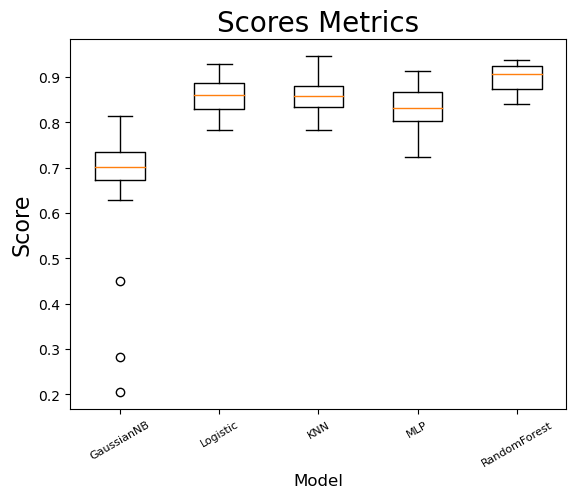

In [120]:
import matplotlib.pyplot as plt

# Draw boxplot 
model_names = ['GaussianNB', 'Logistic', 'KNN', 'MLP', 'RandomForest']
plt.boxplot(all_scores)

# Label (Avoid use plt.figure to return 2 picture)
plt.xlabel('Model', fontsize=12)
plt.xticks(np.arange(len(model_names)) + 1, model_names, rotation=30, fontsize=8)
plt.ylabel('Score', fontsize=16)
plt.title("Scores Metrics", fontsize=20)
plt.show();

Looking at the chart, we can see that `RandomForest` is the algorithm with the highest accuracy when the score fluctuates between 0.83 and 0.95 and the average is about 0.9, so we will choose this model class to develop production.